# N Libraries to Watch Out For in 2023
## Get ahead in 2023

### Motivation

### 1. BentoML

You are probably tired of hearing "Machine learning models don't live in Jupyter Notebooks". If you aren't, I will go ahead and say it once again:

> Machine learning models don't live inside Jupyter, gathering rust.

They live in production, doing what they are actually supposed to do - predicting on new data. 

One of the best libraries I've found last year to deploy models is BentoML. BentoML is an all-in-one framework to maintain, package and deploy models of any framework to any cloud provider as API services. 

It supports saving/loading models in a unified format (versioned and tagged), enabling you to build an organized model registry. 

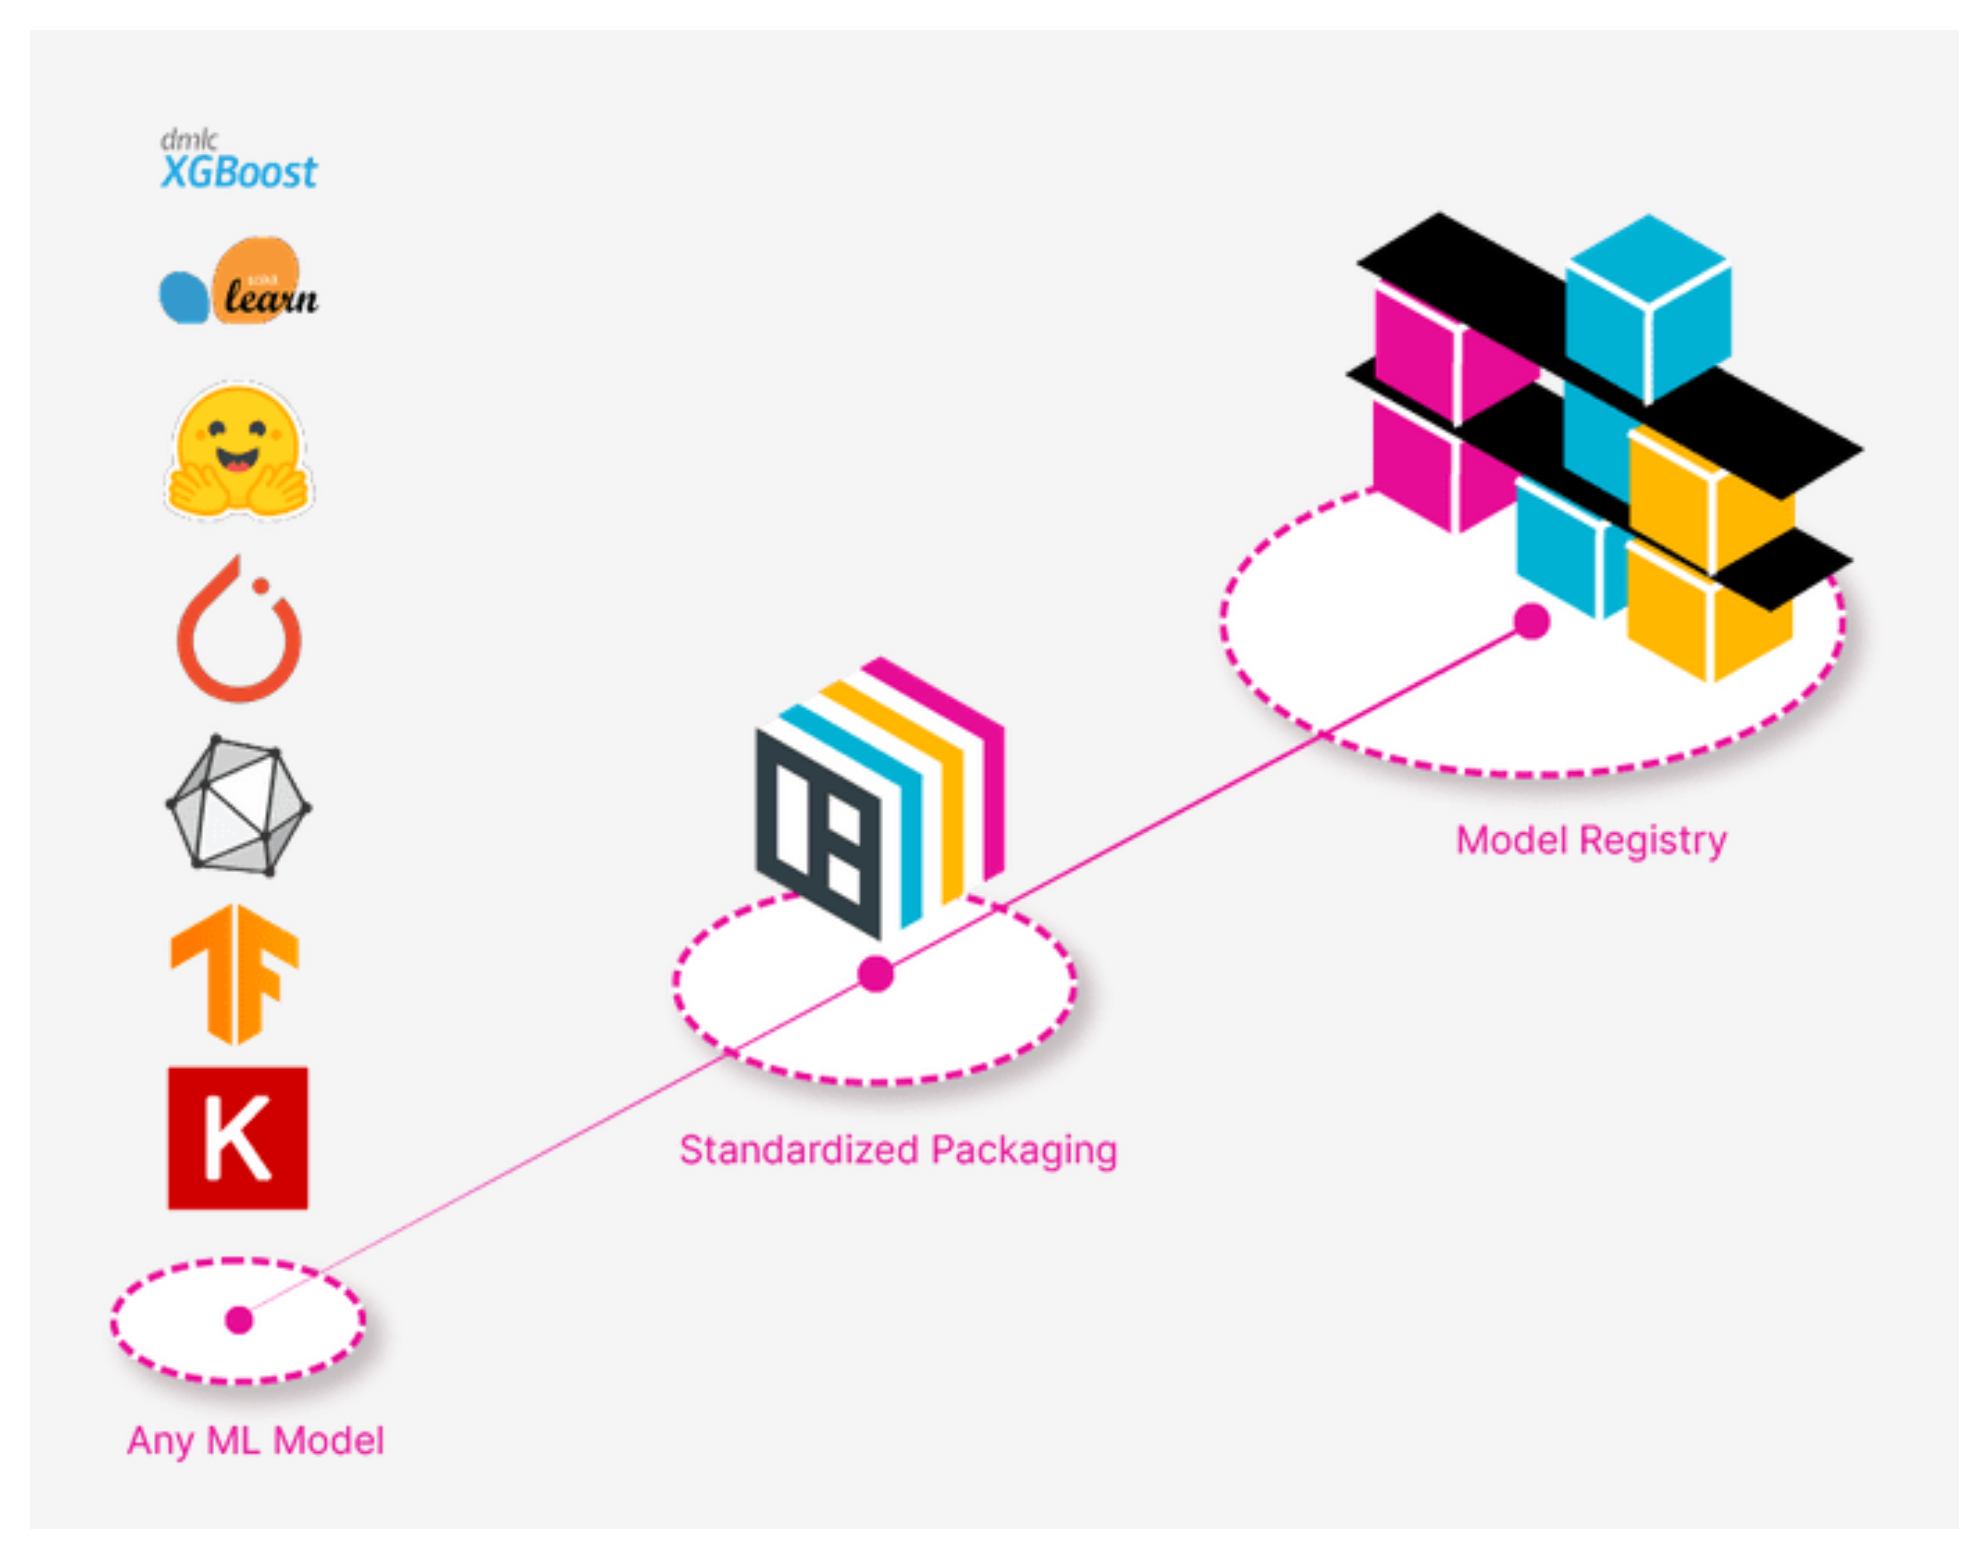

From there, you can build a Docker image of your best model with only a single commands and serve it locally:

```
$ bentoml containerize my_classifier:latest
$ docker run -it --rm -p 3000:3000 my_classifier:6otbsmxzq6lwbgxi serve --production
```

Or deploy it to any cloud provider with a few commands without leaving the CLI. Here is an example for AWS Sagemaker

```
$ pip install bentoctl terraform
$ bentoctl operator install aws-sagemaker
$ export AWS_ACCESS_KEY_ID=REPLACE_WITH_YOUR_ACCESS_KEY
$ export AWS_SECRET_ACCESS_KEY=REPLACE_WITH_YOUR_SECRET_KEY
$ bentoctl init
$ bentoctl build -b model_name:latest -f deployment_config.yaml
$ terraform init
$ terraform apply -var-file=bentoctl.tfvars -auto-approve
```

Here is a step-by-step tutorial where I show how to deploy an XGBoost model to AWS Lambda:

https://towardsdatascience.com/comprehensive-guide-to-deploying-any-ml-model-as-apis-with-python-and-aws-lambda-b441d257f1ec


Stats and links:
- [GitHub (4.4k ⭐)](https://github.com/bentoml/BentoML)
- [Docs 📚](https://docs.bentoml.org/en/latest/#)


### 2. MLFlow

Before deploying your best model into production, you need to produce it via experimentation. Typically, this may take dozens or even hundreds of iterations to get right. 

As the number of iterations grows, it gets harder and harder to keep track of what configurations you've already tried and which of the past experiments look promising.

To help you with the process, you need a reliable framework to keep track of code, data, models, hyperparmaters and metrics all at the same time. 

Building that framework manually (or using Excel like a caveman) is the worst idea in the world as there are so many superb Python libraries for the job.

One of those is MLFlow, my personal favorite. By adding the following line of code to a script that trains a scikit-learn model, MLFlow will capture everything - the model itself, its hyperparameters and any metric you calculate using `sklearn.metrics` functions:

```
mlflow.sklear.autolog()
```

How awesome is that? Once you finish tinkering around, you run `mlflow ui` on the terminal, and it brings up an experiments dashboard with controls to sort and visualize your experiments:

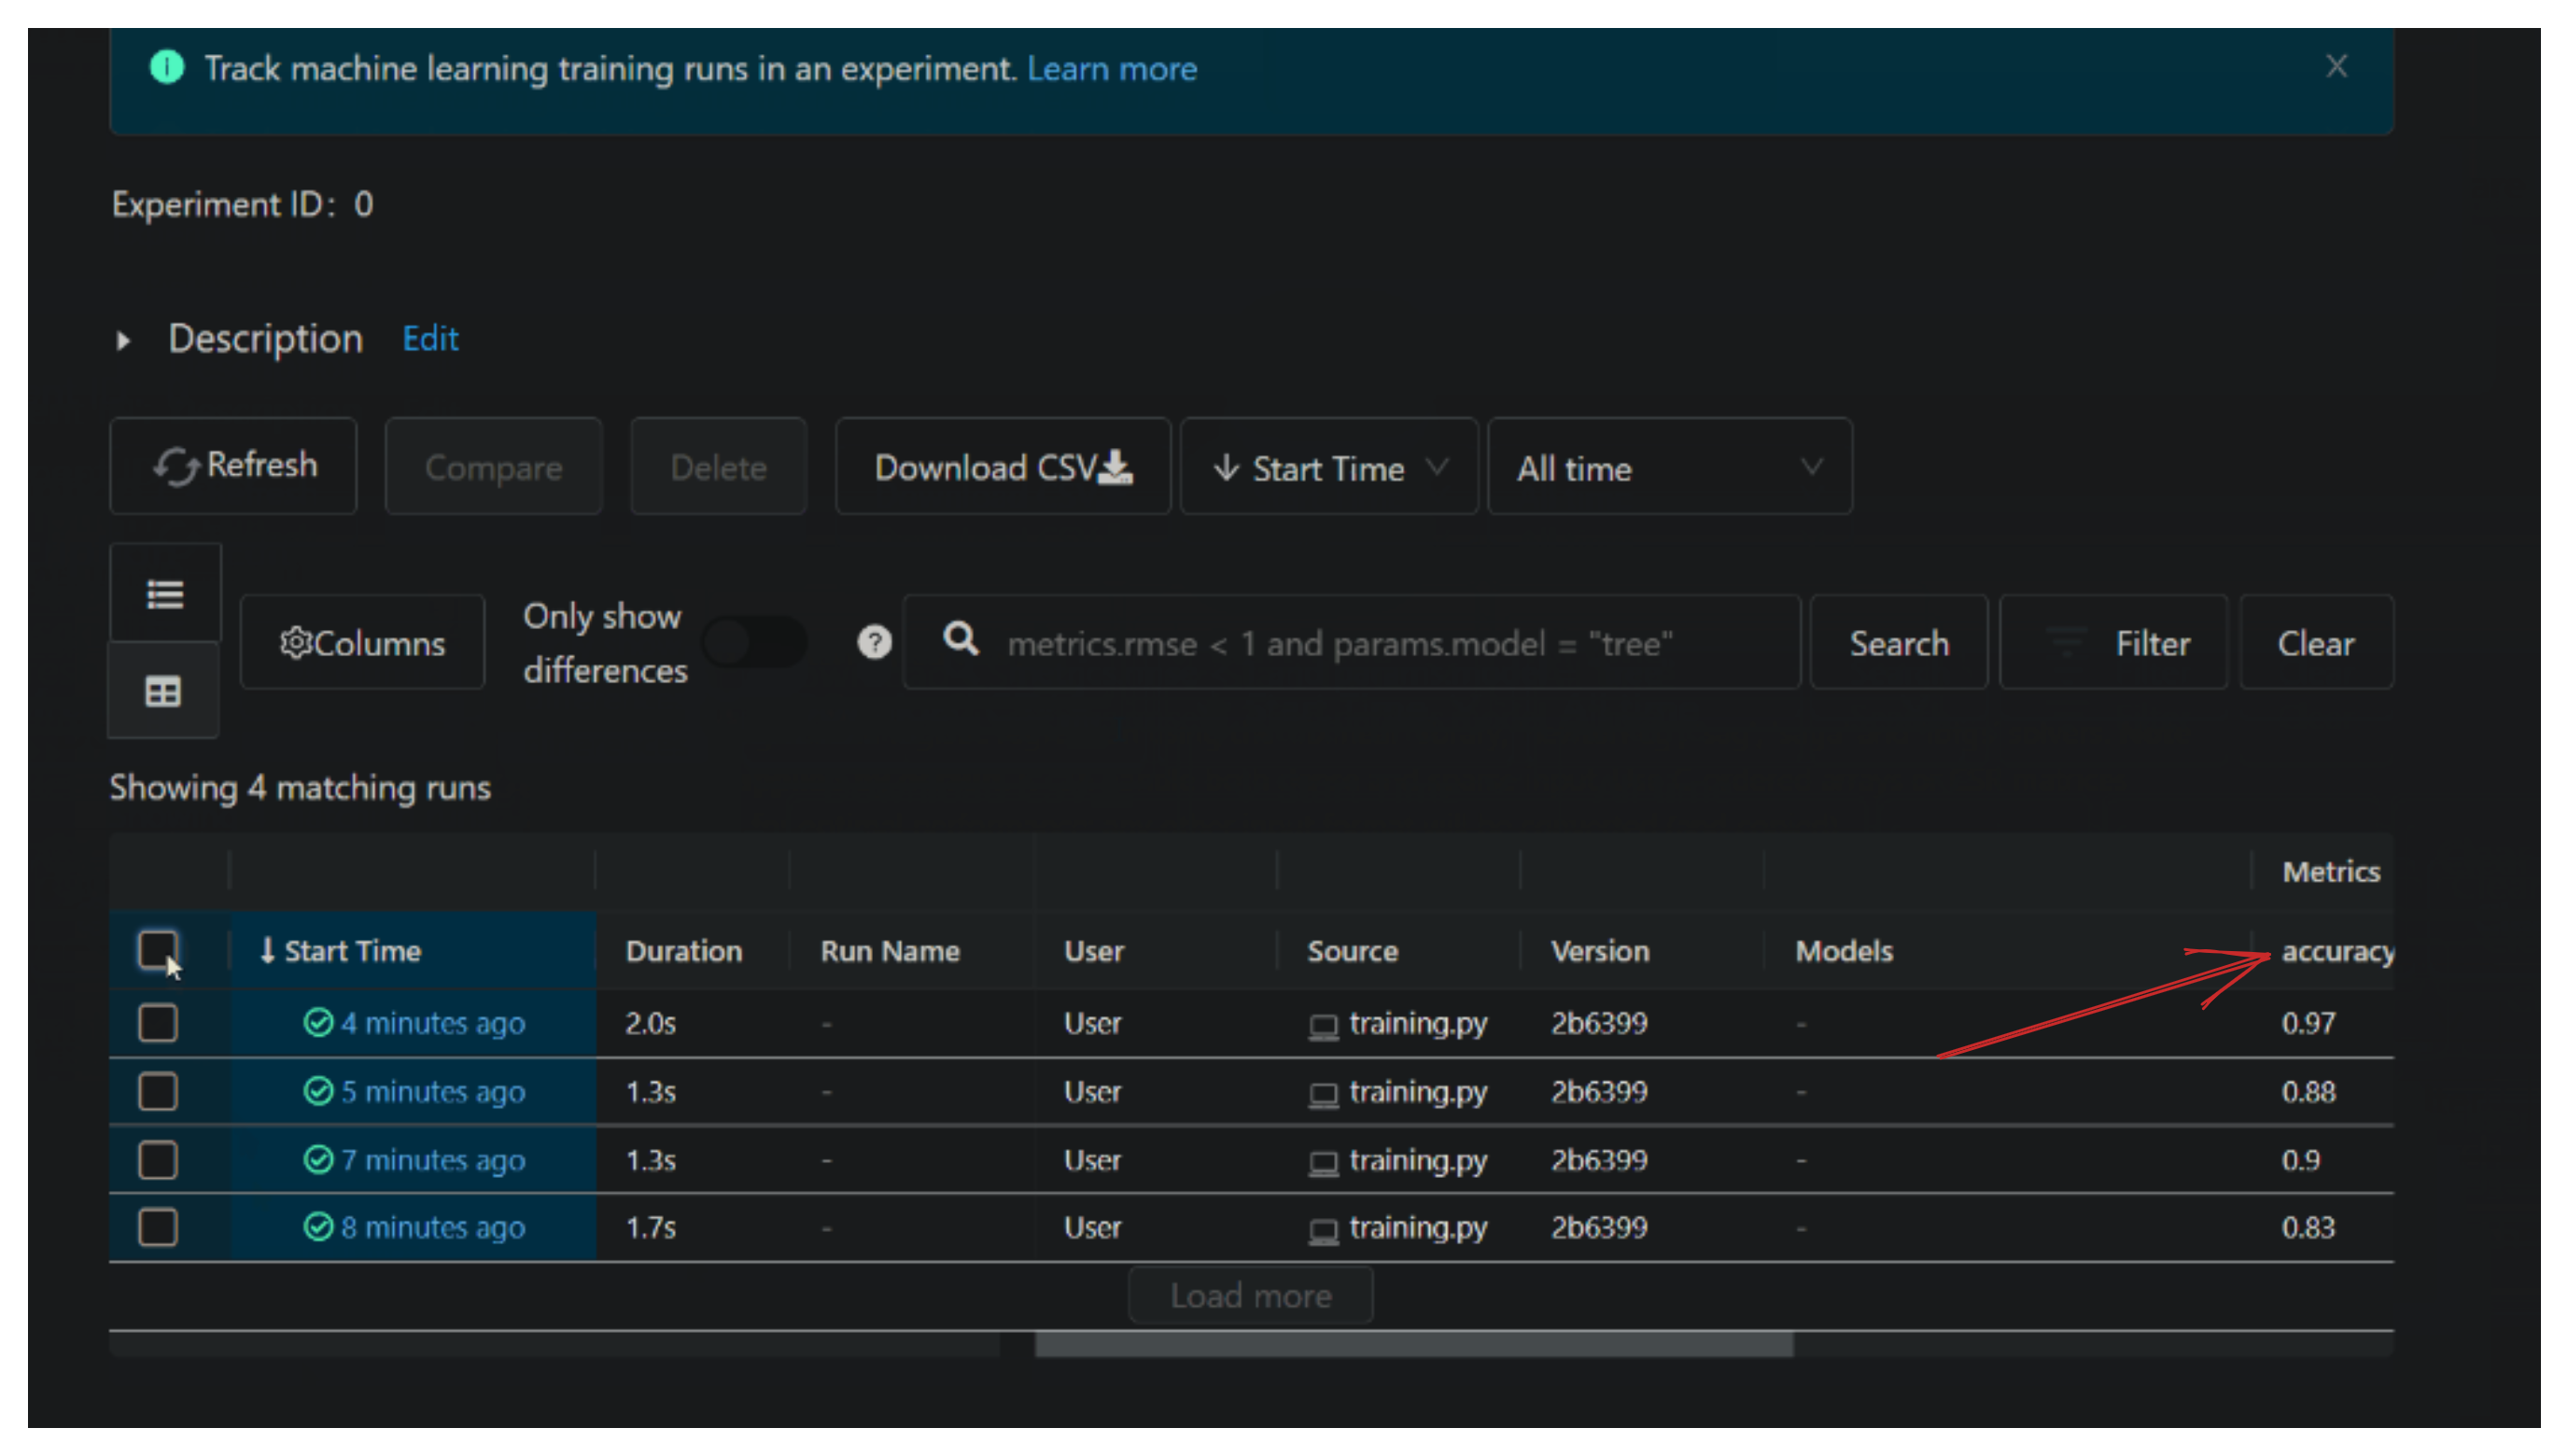

MLFlow has `mlflow.framework.autolog()` feature for more ML libraries than you can name. It is so simple and useful, you cannot *not* use it.

Here is my tutorial on the framework, discussing some of more its features and its integration with the rest of the tools in the data ecosystem.

https://towardsdatascience.com/complete-guide-to-experiment-tracking-with-mlflow-and-dagshub-a0439479e0b9


Stats and links:
- [GitHub (13.3k ⭐)](https://github.com/mlflow/mlflow)
- [Docs 📚](https://mlflow.org/docs/latest/index.html)

### 3. DVC

In a sentence, DVC is Git for data. 

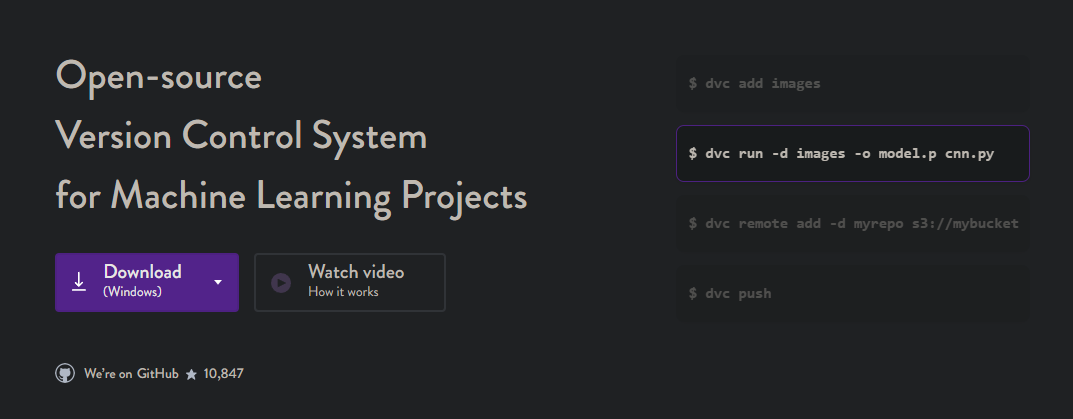

DVC (Data Version Control) is becoming a go-to library for data and model versioning. It can:

1. Track gigabyte-sized datasets or models like Git tracks lightweight scripts.
2. Create branches of the main code base for safe experimentation without duplicating the large files.

When you track a large file or directory with `dvc add directory`, a lightweight `directory.dvc` metadata file is created. Then, DVC manages these lightweight files as placeholders for the original, heavy-weight files. 

DVC lifts the weights, while Git handles the small stuff like your scripts. Together, they make a perfect duo.

Another selling point of DVC is smart workflow pipelines. A typical machine learning workflow involves steps like collecting data, cleaning it, feature engineering and training a model. 

DVC can create a pipeline from all these steps so you can run them all with `dvc repro`. 

What's the smart part? DVC only executes modified steps of the pipeline, saving you hours of time and compute resources. 

Add MLFlow to your training scripts, track the model artifacts with DVC and you have the perfect trio (Git, DVC, MLFlow). 

Check out my beginner-friendly tutorial on DVC to get started:

https://medium.com/towards-data-science/how-to-version-gigabyte-sized-datasets-just-like-code-with-dvc-in-python-5197662e85bd

Stats and links:
- [GitHub (10.8k ⭐)](https://github.com/iterative/dvc)
- [Docs 📚](https://dvc.org/)

### 4. Weights & Biases

Another fully open-source experiment tracking framework is Weights & Biases (wandb.ai). The only difference? It is provided by a company with over $200M in funding and a client base that contains OpenAI, NVIDIA, lyft, BMW, Samsung and so on.

Their main selling points are:

- Excellent integration with the rest of the ML ecosystem like MLFlow
- The most beautiful UI for tracking and comparing experiments (personally)

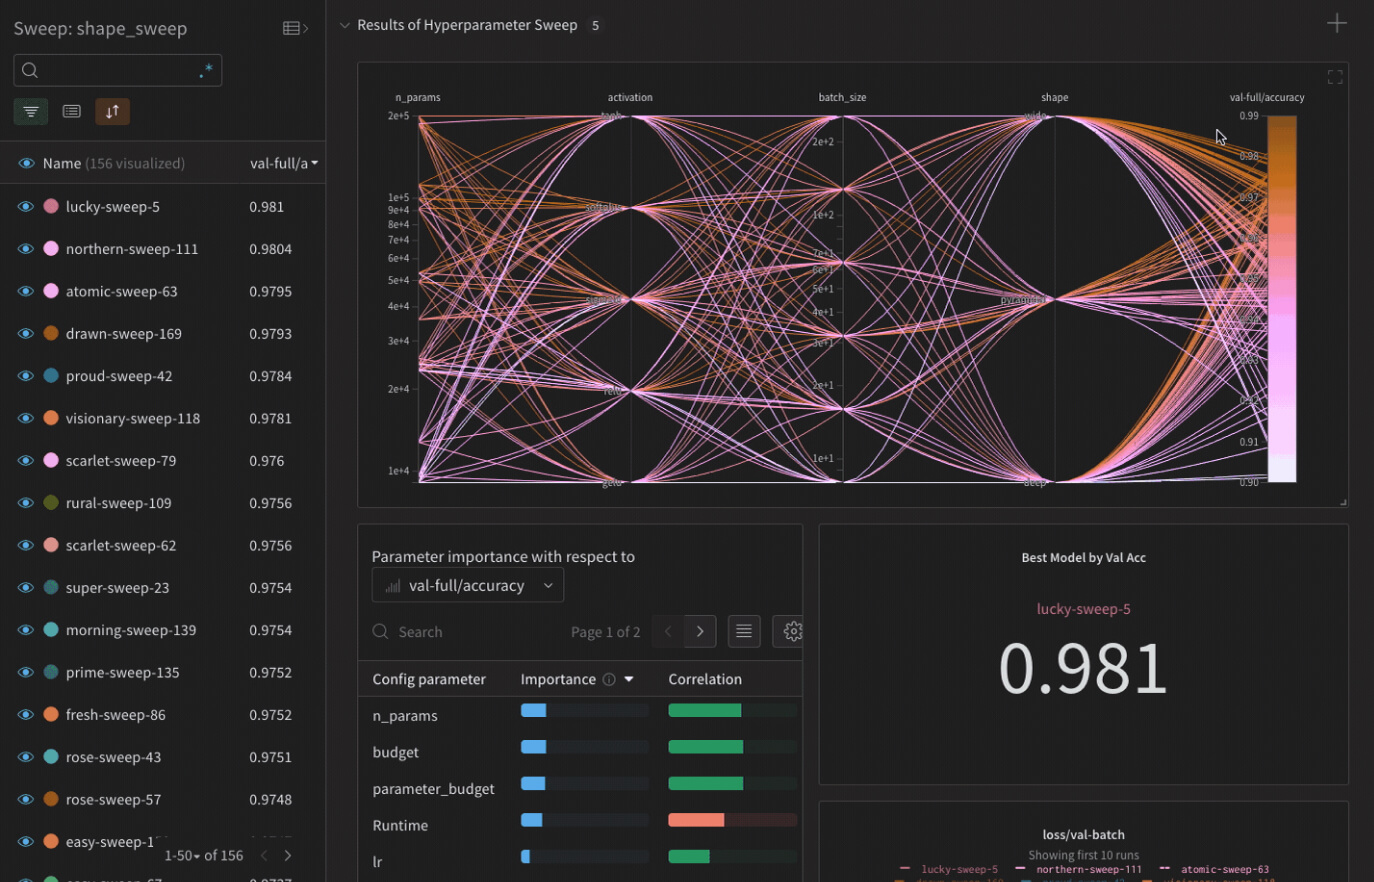

- Collaborative reports and dashboards
- Hyperparameter optimization (not possible in MLFlow)

And the best part is, all the above features are available straight through Jupyter. This means you don't have to ditch your favorite IDE and move into scripts just to track experiments. 

So, your perfect trio might actually be Git, DVC and Weights & Biases. 

Stats and links:
- [GitHub (5.2k ⭐)](https://github.com/wandb/wandb)
- [Docs 📚](https://docs.wandb.ai/)

### 5. NannyML

Deploying the model is only part of the story. To maintain a successful ML-powered product, you have to consistently monitor the models in production.

The problem with model monitoring is that they won't give you nice, fat, red errors when they fail. Their predictions becomes worse and worse as the time passes, leading to a phenomenon called a silent model failure.

For example, let's say you deployed a model that detects Nike clothes from images. Fashion is fast-changing, so Nike constantly improves its designs. 

Since your model training didn't include the new designs, it starts to miss Nike clothes from images more and more. You won't receive an error, but your model will soon be totally useless. 

NannyML helps solve this exact problem. Using a novel [Confidence-Based Performance Estimation](https://nannyml.readthedocs.io/en/stable/how_it_works/performance_estimation.html) algorithm they developed and a few other robust statistical tests, they can detect performance drops or silent model failures in production.

NannyML also features smart alerting so you can always stay in tune with what's happening in your production environment.

Here is a hands-on tutorial to get you started:

https://towardsdatascience.com/data-drift-explainability-interpretable-shift-detection-with-nannyml-83421319d05f

Stats and links:
- [GitHub (1.3k ⭐)](https://github.com/NannyML/nannyml)
- [Docs 📚](https://nannyml.readthedocs.io/en/stable/index.html)


### 6. Poetry

What:
- Python packaging and dependency management framework

Why:
- Dependency resolver
- Isolation
- Easy CLI

Stats and links:
- [GitHub (23.1k ⭐)](https://github.com/python-poetry/poetry)
- [Docs 📚](https://python-poetry.org/)
- In action, tutorial:

https://realpython.com/dependency-management-python-poetry/

### Conclusion